In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('bike-sharing.csv')


In [3]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Домашне задание
====
Для тех же данных, что мы рассмотрели на лекции (bike sharing), сделать следующее:
* Выбрать самостоятельно уровень агрегации (день, неделя, месяц, год), а так же функцию агрегации (среднее, сумма, максимум). 
* Построить базовую наивную модель
* В этот раз применить принцип кросс-валидации для временных рядов, используя выбранную метрику ($R^2$, MSE, MAE, MRSE).


In [4]:
# https://studfile.net/preview/9974842/page:9/

## Возьмём агрегацию по месяцам

In [5]:
df = df[['dteday','cnt']]

In [6]:
df

,dteday,cnt
0,2011-01-01,16
1,2011-01-01,40
2,2011-01-01,32
3,2011-01-01,13
4,2011-01-01,1
...,...,...
17374,2012-12-31,119
17375,2012-12-31,89
17376,2012-12-31,90
17377,2012-12-31,61


In [7]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [8]:
df.set_index('dteday', inplace = True)

In [9]:
df

,cnt
dteday,
2011-01-01,16
2011-01-01,40
2011-01-01,32
2011-01-01,13
2011-01-01,1
...,...
2012-12-31,119
2012-12-31,89
2012-12-31,90


In [10]:
df1 = df.resample('M').mean()

In [11]:
df2 = df.resample('M').max()

In [12]:
df1

,cnt
dteday,
2011-01-31,55.507267
2011-02-28,74.291217
2011-03-31,87.732877
2011-04-30,131.947149
2011-05-31,182.555108
2011-06-30,199.322222
2011-07-31,189.974462
2011-08-31,186.991792
2011-09-30,177.709902


## Короче проверяем разницу между средним и максимальным зрительно

<AxesSubplot:xlabel='dteday'>

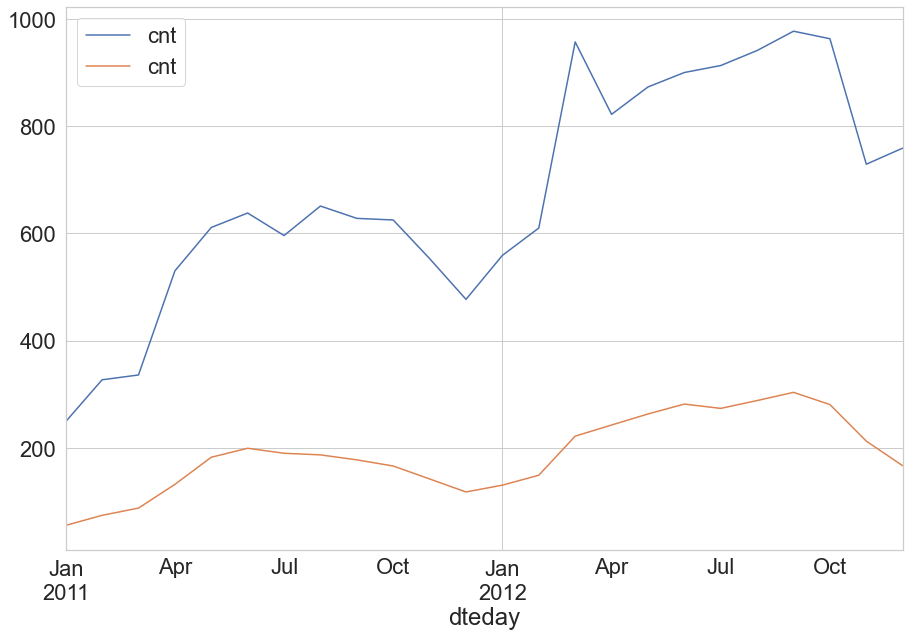

In [13]:
ax = df2.plot()
df1.plot(ax = ax)

### зрительно выглядит отстойно, поэтому будем брать ресемплинг через сумму, а не среднее

In [14]:
df = df.resample('M').sum()
#df = df.resample('M').mean()

In [15]:
x = pd.Series(index = df.index.values, data = df.cnt.values)

In [16]:
pd.Series.to_numpy(x)

array([ 38189,  48215,  64045,  94870, 135821, 143512, 141341, 136691,
       127418, 123511, 102167,  87323,  96744, 103137, 164875, 174224,
       195865, 202830, 203607, 214503, 218573, 198841, 152664, 123713],
      dtype=int64)

In [17]:
y_hat = list()
y_hat.append(np.nan)

In [18]:
for i in range (1,len(x)):
    y_hat.append(x.values[i-1])

In [19]:
y_hat

[nan,
 38189,
 48215,
 64045,
 94870,
 135821,
 143512,
 141341,
 136691,
 127418,
 123511,
 102167,
 87323,
 96744,
 103137,
 164875,
 174224,
 195865,
 202830,
 203607,
 214503,
 218573,
 198841,
 152664]

In [20]:
x.values

array([ 38189,  48215,  64045,  94870, 135821, 143512, 141341, 136691,
       127418, 123511, 102167,  87323,  96744, 103137, 164875, 174224,
       195865, 202830, 203607, 214503, 218573, 198841, 152664, 123713],
      dtype=int64)

In [21]:
x_hat = pd.Series(index = x.index, data = y_hat)

In [22]:
x_hat 

2011-01-31         NaN
2011-02-28     38189.0
2011-03-31     48215.0
2011-04-30     64045.0
2011-05-31     94870.0
2011-06-30    135821.0
2011-07-31    143512.0
2011-08-31    141341.0
2011-09-30    136691.0
2011-10-31    127418.0
2011-11-30    123511.0
2011-12-31    102167.0
2012-01-31     87323.0
2012-02-29     96744.0
2012-03-31    103137.0
2012-04-30    164875.0
2012-05-31    174224.0
2012-06-30    195865.0
2012-07-31    202830.0
2012-08-31    203607.0
2012-09-30    214503.0
2012-10-31    218573.0
2012-11-30    198841.0
2012-12-31    152664.0
dtype: float64

In [23]:
x_hat

2011-01-31         NaN
2011-02-28     38189.0
2011-03-31     48215.0
2011-04-30     64045.0
2011-05-31     94870.0
2011-06-30    135821.0
2011-07-31    143512.0
2011-08-31    141341.0
2011-09-30    136691.0
2011-10-31    127418.0
2011-11-30    123511.0
2011-12-31    102167.0
2012-01-31     87323.0
2012-02-29     96744.0
2012-03-31    103137.0
2012-04-30    164875.0
2012-05-31    174224.0
2012-06-30    195865.0
2012-07-31    202830.0
2012-08-31    203607.0
2012-09-30    214503.0
2012-10-31    218573.0
2012-11-30    198841.0
2012-12-31    152664.0
dtype: float64

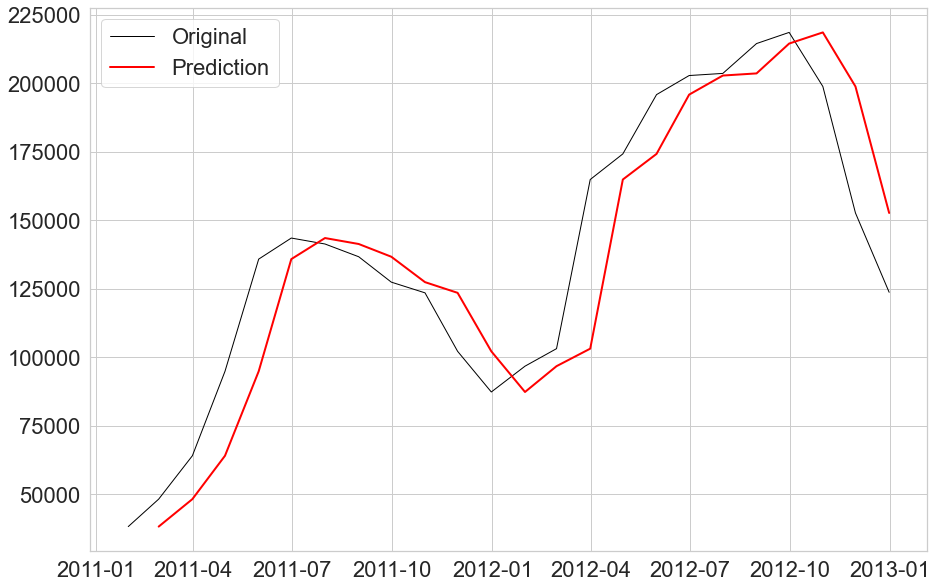

In [24]:
fig, ax = plt.subplots()
ax.plot(x, linewidth = 1, color = 'black', label = 'Original')
ax.plot(x_hat, linewidth = 2, color = 'red', label = 'Prediction')
ax.legend()
plt.show()

In [25]:
df['cnt_hat'] = x_hat
df.dropna(inplace=True)

In [26]:
print('MSE', mean_squared_error(df.cnt, df.cnt_hat))
print('MAE', mean_absolute_error(df.cnt, df.cnt_hat))
print('R2', r2_score(df.cnt, df.cnt_hat))

MSE 516612996.26086956
MAE 16853.130434782608
R2 0.7741229400590703


In [27]:
df.cnt_hat

dteday
2011-02-28     38189.0
2011-03-31     48215.0
2011-04-30     64045.0
2011-05-31     94870.0
2011-06-30    135821.0
2011-07-31    143512.0
2011-08-31    141341.0
2011-09-30    136691.0
2011-10-31    127418.0
2011-11-30    123511.0
2011-12-31    102167.0
2012-01-31     87323.0
2012-02-29     96744.0
2012-03-31    103137.0
2012-04-30    164875.0
2012-05-31    174224.0
2012-06-30    195865.0
2012-07-31    202830.0
2012-08-31    203607.0
2012-09-30    214503.0
2012-10-31    218573.0
2012-11-30    198841.0
2012-12-31    152664.0
Freq: M, Name: cnt_hat, dtype: float64

## CV  

In [28]:
x_split = np.split(x.values, 6)

In [29]:
x_split

[array([38189, 48215, 64045, 94870], dtype=int64),
 array([135821, 143512, 141341, 136691], dtype=int64),
 array([127418, 123511, 102167,  87323], dtype=int64),
 array([ 96744, 103137, 164875, 174224], dtype=int64),
 array([195865, 202830, 203607, 214503], dtype=int64),
 array([218573, 198841, 152664, 123713], dtype=int64)]

1 Interation
2011-01-31        NaN
2011-02-28    38189.0
2011-03-31    48215.0
2011-04-30    64045.0
2011-05-31    94870.0
dtype: float64
Train
MSE 744568650.5
MAE 24408.0
R2 0.33375839234063365


Test
MSE 607485216.6
MAE 21064.6
R2 0.5746231458695754


ГРАФИК КРОСС ВАЛИДАЦИИ(ПЕРЕХОД ДАННЫХ)


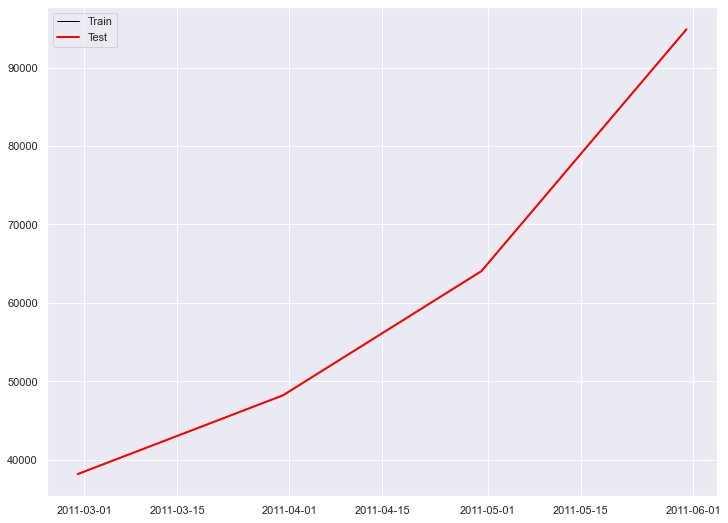

2 Interation
2011-06-30    135821
2011-07-31    143512
2011-08-31    141341
2011-09-30    136691
dtype: int64
Train
MSE 393718794.125
MAE 15177.125
R2 0.682748938162562


Test
MSE 744568650.5
MAE 24408.0
R2 0.33375839234063365


ГРАФИК КРОСС ВАЛИДАЦИИ(ПЕРЕХОД ДАННЫХ)


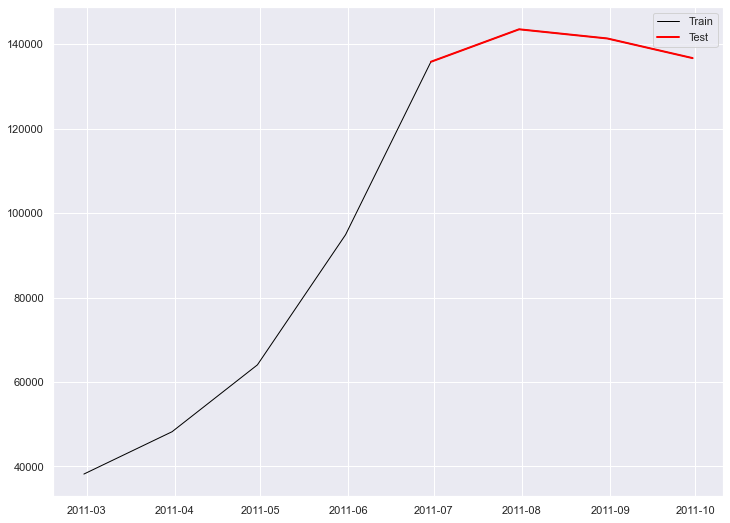

3 Interation
2011-10-31    127418
2011-11-30    123511
2011-12-31    102167
2012-01-31     87323
dtype: int64
Train
MSE 327473409.5833333
MAE 14244.416666666666
R2 0.6378786023091039


Test
MSE 744568650.5
MAE 24408.0
R2 0.33375839234063365


ГРАФИК КРОСС ВАЛИДАЦИИ(ПЕРЕХОД ДАННЫХ)


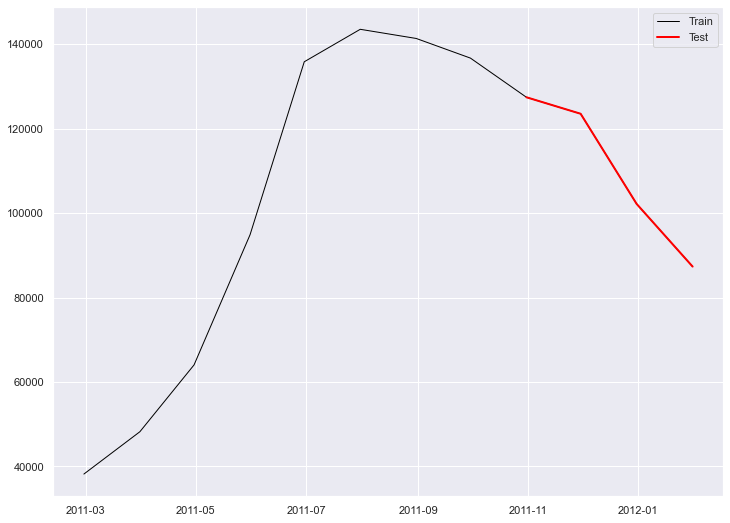

4 Interation
2012-02-29     96744
2012-03-31    103137
2012-04-30    164875
2012-05-31    174224
dtype: int64
Train
MSE 521116793.125
MAE 16878.375
R2 0.6439269471827515


Test
MSE 744568650.5
MAE 24408.0
R2 0.33375839234063365


ГРАФИК КРОСС ВАЛИДАЦИИ(ПЕРЕХОД ДАННЫХ)


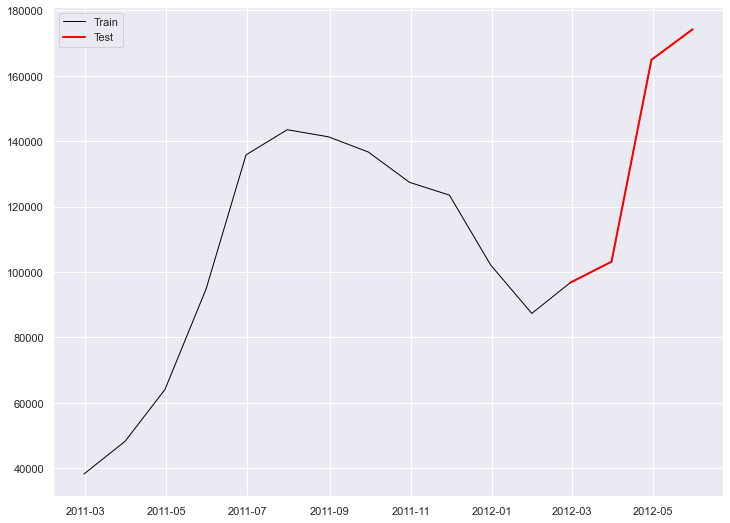

5 Interation
2012-06-30    195865
2012-07-31    202830
2012-08-31    203607
2012-09-30    214503
dtype: int64
Train
MSE 426113568.0
MAE 14638.1
R2 0.8251720044641723


Test
MSE 744568650.5
MAE 24408.0
R2 0.33375839234063365


ГРАФИК КРОСС ВАЛИДАЦИИ(ПЕРЕХОД ДАННЫХ)


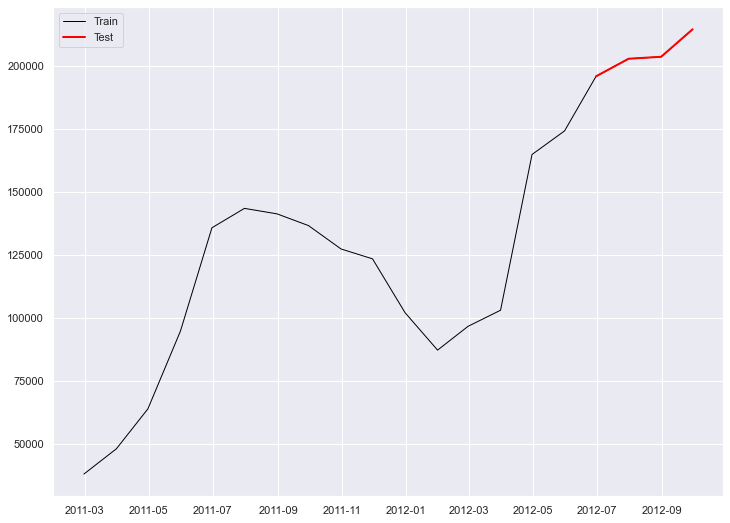

In [43]:
y_hat = list()
y_hat.append(np.nan)
k = 0
for i in range(len(x_split)):
    for j in range (len(x_split[i])):
        y_hat.append(x_split[i][j])
        try:
            x_hat_train = pd.Series(index = x.index[1:len(y_hat)], data = y_hat[1:len(y_hat)])
        except ValueError:
            continue 
    try:
        x_hat_test = pd.Series(index = x.index[k:len(y_hat)], data = y_hat[k:len(y_hat)])
        k = len(y_hat)
    except ValueError:
        continue    
    
    #ЕБАНИ ЭКСЕПШН завтра
    #df['cnt_hat'] = x_hat_train
    print(i+1, 'Interation')
    print(x_hat_test)
    print('Train')
    print('MSE', mean_squared_error(df.cnt[0:len(x_hat_train)], df.cnt_hat[0:len(x_hat_train)]))
    print('MAE', mean_absolute_error(df.cnt[0:len(x_hat_train)], df.cnt_hat[0:len(x_hat_train)]))
    print('R2', r2_score(df.cnt[0:len(x_hat_train)], df.cnt_hat[0:len(x_hat_train)]))
    print('\n')
    print('Test')
    print('MSE', mean_squared_error(df.cnt[0:len(x_hat_test)], df.cnt_hat[0:len(x_hat_test)]))
    print('MAE', mean_absolute_error(df.cnt[0:len(x_hat_test)], df.cnt_hat[0:len(x_hat_test)]))
    print('R2', r2_score(df.cnt[0:len(x_hat_test)], df.cnt_hat[0:len(x_hat_test)]))
    print('\n')
    print("ГРАФИК КРОСС ВАЛИДАЦИИ(ПЕРЕХОД ДАННЫХ)")
    
    sns.set(rc={'figure.figsize':(12, 9)})
    fig, ax = plt.subplots()
    ax.plot(x_hat_train, linewidth = 1, color = 'black', label = 'Train')
    ax.plot(x_hat_test, linewidth = 2, color = 'red', label = 'Test')
    ax.legend()
    plt.show()

        

In [ ]:
y_hat

In [ ]:
x_hat

In [ ]:
df.cnt_hat[0:len(x_hat)]

In [ ]:
df.cnt[0:len(x_hat)]

In [ ]:
x.index